In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import math
import warnings
warnings.filterwarnings("ignore")
import yfinance as yf
yf.pdr_override()

In [3]:
symbol = 'AAPL'
market = '^GSPC'
start = '2021-08-20'
end = '2022-08-20'
df = yf.download(symbol,start,end)
dfm = yf.download(market,start,end)
df.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-20,147.440002,148.500000,146.779999,148.190002,147.364243,60549600
2021-08-23,148.309998,150.190002,147.889999,149.710007,148.875778,60131800
2021-08-24,149.449997,150.860001,149.149994,149.619995,148.786270,48606400
2021-08-25,149.809998,150.320007,147.800003,148.360001,147.533279,58991300
2021-08-26,148.350006,149.119995,147.509995,147.539993,146.717865,48597200


In [4]:
df.shape

(252, 6)

In [5]:
new_df = pd.DataFrame({symbol : df['Adj Close'], market : dfm['Adj Close']}, index=df.index)
new_df[['stock_returns','market_returns']] = new_df[[symbol,market]] / new_df[[symbol,market]].shift(1) -1
new_df = new_df.dropna()
covmat = np.cov(new_df["stock_returns"],new_df["market_returns"])
beta = covmat[0,1]/covmat[1,1]
alpha= np.mean(new_df["stock_returns"])-beta*np.mean(new_df["market_returns"])

In [6]:
print('Beta:', beta)
print('Alpha:', alpha)

Beta: 1.261881487724189
Alpha: 0.0009296620952151605


In [7]:
close = df['Adj Close']

In [8]:
mean = np.mean(close)
mean

157.2610487559485

In [9]:
median = np.median(close)
median

157.0263900756836

In [10]:
mode = stats.mode(close)
print("The modal value is {} with a count of {}".format(mode.mode[0], mode.count[0]))

The modal value is 141.4635009765625 with a count of 2


In [11]:
range_of_stock = np.ptp(close)
range_of_stock

51.38032531738281

In [12]:
variance = np.var(close)
variance

157.32670319994202

In [13]:
standard_deviation = np.std(close)
standard_deviation

12.542994187989645

In [14]:
standard_error = stats.sem(close)
standard_error

0.7917067729547338

In [15]:
z = np.abs(stats.zscore(close))
print(z)

Date
2021-08-20    0.789031
2021-08-23    0.668522
2021-08-24    0.675658
2021-08-25    0.775554
2021-08-26    0.840564
                ...   
2022-08-15    1.269948
2022-08-16    1.257192
2022-08-17    1.378375
2022-08-18    1.346484
2022-08-19    1.136806
Name: Adj Close, Length: 252, dtype: float64


In [17]:
data_crosstab = pd.crosstab(df['High'], df['Low'],margins = False) 
print(data_crosstab) 

Low         129.039993  129.809998  131.440002  131.479996  132.160004  \
High                                                                     
132.389999           1           0           0           0           0   
133.080002           0           1           0           0           0   
133.889999           0           0           0           1           0   
135.199997           0           0           1           0           0   
137.059998           0           0           0           0           0   
...                ...         ...         ...         ...         ...   
181.139999           0           0           0           0           0   
181.330002           0           0           0           0           0   
182.130005           0           0           0           0           0   
182.880005           0           0           0           0           0   
182.940002           0           0           0           0           0   

Low         132.610001  133.320007  1

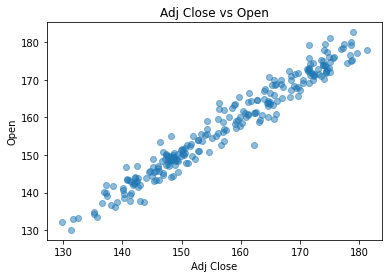

In [18]:
plt.scatter(df['Adj Close'], df['Open'], alpha=0.5)
plt.title('Adj Close vs Open')
plt.xlabel('Adj Close')
plt.ylabel('Open')
plt.show()

In [20]:
from sklearn.linear_model import LinearRegression
X = np.array(df['Open']).reshape(252,-1)
y = np.array(df['Adj Close'])
LR = LinearRegression().fit(X, y)
LR.score(X, y)

0.9574089645658387

In [21]:
LR.coef_

array([0.97190074])

In [22]:
LR.intercept_

4.1340376780666475

In [23]:
LR.predict(X)

array([147.4310852 , 148.2766341 , 149.38460035, 149.73448521,
       148.31551843, 147.4699547 , 148.94724798, 152.50440825,
       152.6696296 , 153.68039984, 153.57349017, 154.74949659,
       156.70301174, 155.25488912, 154.77865242, 150.53145093,
       150.25931991, 148.51960928, 148.40298594, 148.77231297,
       143.8933671 , 144.01970411, 144.52509665, 146.66327531,
       145.70110307, 145.51643955, 143.35881872, 142.60073733,
       143.75730159, 142.04674679, 141.91068128, 139.70447728,
       139.68503511, 143.17415521, 144.11690012, 142.40636015,
       143.33937656, 141.40530358, 142.25085247, 143.86421126,
       143.55319591, 147.01316017, 148.65567479, 148.76258447,
       149.61786186, 148.63623263, 149.26797701, 149.29713284,
       149.74421371, 147.21726585, 148.93753431, 148.61680529,
       150.29818942, 151.45475367, 151.75604053, 151.28953232,
       150.1135259 , 149.93859089, 148.90837848, 148.39325744,
       150.27874725, 149.86083705, 150.89104946, 153.52

In [24]:
df['Returns'] = df['Adj Close'].pct_change()
df['Returns'] = df['Returns'].dropna()

In [25]:
values = []
S = df['Returns'][-1] 
T = 252
mu = df['Returns'].mean() 
sigma = df['Returns'].std()*math.sqrt(252)

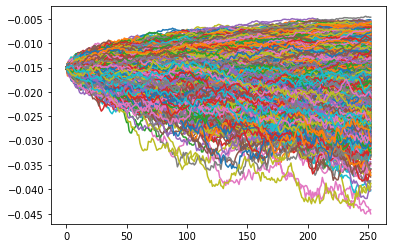

In [ ]:
for i in range(10000):
    # Create list of daily returns using random normal distribution
    daily_returns=np.random.normal(mu/T,sigma/math.sqrt(T),T)+1
    
    # Set starting price and create price series generated by above random daily returns
    price_list = [S]
    
    for x in daily_returns:
        price_list.append(price_list[-1]*x)

    # Plot the data
    plt.plot(price_list)
plt.show()